In [1]:
# imports
from astropy.io import fits
import matplotlib.pyplot as plt
# import matplotlib as mpl
import plotting as myP
import numpy as np
import csv 
import match

In [2]:
# path variables 
path_cat = 'D:\IfA REU\Catalogs'
path_fig = 'D:\IfA REU\IfA-REU-Project\Figures'
path_csv = 'D:\IfA REU\IfA-REU-Project\Lists'

# Read AGN Lists From CSV

In [88]:
# read from a given csv file and return a list of its contents 
def ReadFile(filename) : 
    # initialize list
    file = []

    # open csv file
    with open(path_csv+filename, newline='') as csv_file : 
        reader = csv.reader(csv_file, delimiter=',', quotechar='"')
        # output file into list for easy access
        for row in reader :
            file.append(row)

    # print column names 
    print(filename, '\tcolumns: ', file[0])

    # return an array of type int with column names clipped off
    return( np.array(file[1:], dtype=int) )


In [87]:
## read AGN ID and index from csv files
# COSMOS 2020
agn_irSel20 = ReadFile('\Match_COSMOS2020_IRAGN_to_COSMOS2020.csv')
agn_xrSel20 = ReadFile('\Match_Chandra2016_XrayAGN_to_COSMOS2020.csv')
# Chandra 2016
agn_irSel16 = ReadFile('\Match_COSMOS2020_IRAGN_to_Chandra2016.csv')
agn_xrSel16 = ReadFile('\Match_Chandra2016_XrayAGN_to_Chandra2016.csv')

## transpose arrays to get columns
# COSMOS 2020
agn_irSel20_id, agn_irSel20_i = agn_irSel20.T
agn_xrSel20_id, agn_xrSel20_i = agn_xrSel20.T
# Chandra 2016
agn_irSel16_id, agn_irSel16_i = agn_irSel16.T
agn_xrSel16_id, agn_xrSel16_i = agn_xrSel16.T

\Match_COSMOS2020_IRAGN_to_COSMOS2020.csv 	columns:  ['ID', 'i']
\Match_Chandra2016_XrayAGN_to_COSMOS2020.csv 	columns:  ['ID', 'i']
\Match_COSMOS2020_IRAGN_to_Chandra2016.csv 	columns:  ['ID', 'i']
\Match_Chandra2016_XrayAGN_to_Chandra2016.csv 	columns:  ['ID', 'i']


In [86]:
# print info
print('Number of IR AGN in COSMOS 2020:\t',    len(agn_irSel20_id))
print('Number of Xray AGN in COSMOS 2020:\t',  len(agn_xrSel20_id))
print('Number of IR AGN in Chandra 2016:\t',   len(agn_irSel16_id))
print('Number of Xray AGN in Chandra 2016:\t', len(agn_xrSel16_id))

Number of IR AGN in COSMOS 2020:	 2287
Number of Xray AGN in COSMOS 2020:	 2176
Number of IR AGN in Chandra 2016:	 746
Number of Xray AGN in Chandra 2016:	 2232


In [6]:
# ## test: left and right must match
# # COSMOS 2020 
# print(agn_irSel20[0][0], '==', agn_irSel20_id[0])
# print(agn_irSel20[0][1], '==', agn_irSel20_i[0])
# print(agn_xrSel20[0][0], '==', agn_xrSel20_id[0])
# print(agn_xrSel20[0][1], '==', agn_xrSel20_i[0])
# # Chandra 2016
# print(agn_irSel16[0][0], '==', agn_irSel16_id[0])
# print(agn_irSel16[0][1], '==', agn_irSel16_i[0])
# print(agn_xrSel16[0][0], '==', agn_xrSel16_id[0])
# print(agn_xrSel16[0][1], '==', agn_xrSel16_i[0])

# Get Data From Catalogs

In [7]:
# open COSMOS 2020 catalog file and get data 
inf20 = fits.open(path_cat+'\COSMOS2020_CLASSIC_R1_v2.0_master.fits')
data20 = inf20[1].data
cols20 = inf20[1].columns
inf20.close()

In [8]:
# get IRAC data (unit = 'uJy')
ch1_data  = np.array(data20['SPLASH_CH1_FLUX']) # 3.5686 um
print('Ch1 read')
ch2_data  = np.array(data20['SPLASH_CH2_FLUX']) # 4.5067 um
print('Ch2 read')
ch3_data  = np.array(data20['SPLASH_CH3_FLUX']) # 5.7788 um
print('Ch3 read')
ch4_data  = np.array(data20['SPLASH_CH4_FLUX']) # 7.9958 um 
print('Ch4 read')

Ch1 read
Ch2 read
Ch3 read
Ch4 read


In [9]:
# open COSMOS 2016 catalog file and get data 
inf16 = fits.open(path_cat+'\chandra_COSMOS_legacy_opt_NIR_counterparts_20160113_4d.fits')
data16 = inf16[1].data
cols16 = inf16[1].columns
inf16.close()

In [85]:
# get data arrays from columns
L0510_data = np.array(data16['Lx_0510'])        # x-ray luminosity in the 0.5-10 KeV band
print('L0510 read')

L0510 read


# Isolate Data By Selection Method

In [11]:
# match agn ids
key_ir, key_xr = match.match(agn_irSel20_id, agn_xrSel20_id)

# initialize
mask_ir = np.ones(agn_irSel20_id.size, dtype=bool)
mask_xr = np.ones(agn_xrSel20_id.size, dtype=bool)

# set matched index to false
mask_ir[key_ir] = False
mask_xr[key_xr] = False

# remove xray selected agn from ir selected list
agn_irSel20_id_ONLY = agn_irSel20_id[mask_ir]
agn_irSel20_i_ONLY  = agn_irSel20_i[mask_ir]

# remove ir selected agn from xray selected list 
agn_xrSel20_id_ONLY = agn_xrSel20_id[mask_xr]
agn_xrSel20_i_ONLY  = agn_xrSel20_i[mask_xr]

# create list of ir/xray match
agn20_id_BOTH = agn_irSel20_id[key_ir]
agn20_i_BOTH  = agn_irSel20_i[key_ir]

In [12]:
# print info 
print('Number of IR only:\t',   len(agn_irSel20_i_ONLY))
print('Number of Xray only:\t', len(agn_xrSel20_i_ONLY))
print('Number of matches:\t',   len(agn20_i_BOTH))

Number of IR only:	 1640
Number of Xray only:	 1529
Number of matches:	 647


In [42]:
# returns the IRAC channels only at indeces i 
def SelectIRAC(i, applyMask=True, printInfo=True):
    # get data
    a = ch1_data[i]
    b = ch2_data[i]
    c = ch3_data[i]
    d = ch4_data[i]

    if(applyMask == True) :
        # mask bad values 
        mask = (a > 0) & (b > 0) & (c > 0) & (d > 0)
        # apply mask 
        a = a[mask]
        b = b[mask]
        c = c[mask]
        d = d[mask] 

    if(printInfo == True) : 
        # print info
        print('Col \t Min \t\t Max \t\t Count')
        print('-------------------------------------------------------------')
        print('CH1 \t', min(a), '\t', max(a), '\t', len(a))
        print('CH2 \t', min(b), '\t', max(b), '\t', len(b))
        print('CH3 \t', min(c), '\t', max(c), '\t', len(c))
        print('CH4 \t', min(d), '\t', max(d), '\t', len(d))
        print('-------------------------------------------------------------')
    
    # return data 
    return a,b,c,d

In [89]:
# filter data by selection method
ch1_ir, ch2_ir, ch3_ir, ch4_ir = SelectIRAC(agn_irSel20_i_ONLY, True, False)
ch1_xr, ch2_xr, ch3_xr, ch4_xr = SelectIRAC(agn_xrSel20_i_ONLY, True, False)
ch1_ix, ch2_ix, ch3_ix, ch4_ix = SelectIRAC(agn20_i_BOTH, True, False)

# Plot IRAC Colors With Exclusive Selection Lists

In [16]:
# calculate colors for ir 
x_ir = np.log10( ch3_ir / ch1_ir ) # x = log10 ( f_5.6um / f_3.6um )
y_ir = np.log10( ch4_ir / ch2_ir ) # y = log10 ( f_8.0um / f_4.5 um )

# calculate colors for xray 
x_xr = np.log10( ch3_xr / ch1_xr ) # x = log10 ( f_5.6um / f_3.6um )
y_xr = np.log10( ch4_xr / ch2_xr ) # y = log10 ( f_8.0um / f_4.5 um )

# calculate colors for matched ir/xray
x_ix = np.log10( ch3_ix / ch1_ix ) # x = log10 ( f_5.6um / f_3.6um )
y_ix = np.log10( ch4_ix / ch2_ix ) # y = log10 ( f_8.0um / f_4.5 um )

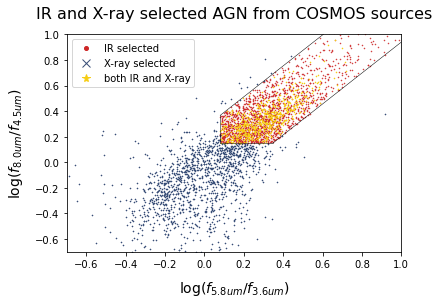

In [90]:
# set standard plot format
myP.SetStyle()

# plot data
plt.plot(x_ir, y_ir, '.', c=myP.c_ir,       markersize=1, label='IR selected')
plt.plot(x_xr, y_xr, 'x', c=myP.c_xray,     markersize=1, label='X-ray selected')
plt.plot(x_ix, y_ix, '*', c=myP.c_ir_xray,  markersize=1, label='both IR and X-ray')

# draw box
myP.PlotDonleyWedge()

# customize
plt.legend(markerscale=8)
plt.title('IR and X-ray selected AGN from COSMOS sources') 

# set axis size and save
plt.axis([-1.5,2.5,-1.5,2.5]) 
plt.savefig(path_fig+'\COSMOS_IR-Xray_selection_FULL.png',bbox_inches ="tight",pad_inches=0.2,facecolor='w',edgecolor='w')
plt.axis([-0.7,1.0,-0.7,1.0]) 
plt.savefig(path_fig+'\COSMOS_IR-Xray_selection_ZOOM.png',bbox_inches ="tight",pad_inches=0.2,facecolor='w',edgecolor='w')

# display
plt.show()

# Match Xray Data to IRAC Datapoints

In [29]:
# match ir selected agn to the xray catalog
key20, key16 = match.match(agn_irSel20_id, agn_irSel16_id)

# mask 
mask_woX = np.ones(agn_irSel20_id.size, dtype=bool)
mask_woX[key20] = False

# get array of xray data for ir agn
agn_irSel16_id_wX = agn_irSel16_id[key16]
agn_irSel16_i_wX  = agn_irSel16_i[key16]

# get array of ir selected agn with Xray data 
agn_irSel20_id_wX = agn_irSel20_id[key20]
agn_irSel20_i_wX  = agn_irSel20_i[key20]

# get array of ir selected agn without Xray data 
agn_irSel20_id_woX = agn_irSel20_id[mask_woX]
agn_irSel20_i_woX  = agn_irSel20_i[mask_woX]

In [79]:
# Get IRAC data for ir selected agn 
ch1_wX, ch2_wX, ch3_wX, ch4_wX     = SelectIRAC(agn_irSel20_i_wX, False, False)
ch1_woX, ch2_woX, ch3_woX, ch4_woX = SelectIRAC(agn_irSel20_i_woX, False, False)

# Get Xray luminosity for ir selected agn
Lx_ir = L0510_data[agn_irSel16_i_wX] 

# NOTE: ch#_wX and Lx_ir are parallel lists 

In [82]:
# # Get IRAC data for xray_ONLY selected agn 
# ch1_X, ch2_X, ch3_X, ch4_X = SelectIRAC(agn_xrSel20_i_ONLY, False, False)

# # filter out bad values 
# mask_X = (ch1_X > 0) & (ch2_X > 0) & (ch3_X > 0) & (ch4_X > 0)

# # apply mask
# agn_xrSel20_id_ONLY_VALID =  agn_xrSel20_id_ONLY[mask_X]
# agn_xrSel20_i_ONLY_VALID  =  agn_xrSel20_i_ONLY[mask_X]
# ch1_X = ch1_X[mask_X]
# ch2_X = ch2_X[mask_X]
# ch3_X = ch3_X[mask_X]
# ch4_X = ch4_X[mask_X]


In [75]:
# # test
# print('Do IR and Xray lists match?')
# print('Length:', len(agn_irSel20_id_wX), '==', len(agn_irSel16_id_wX))
# print('First ID:',  agn_irSel20_id_wX[0], '==', agn_irSel16_id_wX[0])
# print('\n')

# print('Does the Xray data match?')
# print('ID:', agn_irSel16_id_wX[0])
# i0 = agn_irSel16_i_wX[0]
# print('i:', i0)
# print('Lx:', Lx_ir[0])
# print('Lx:', L0510_data[i0])
# print('\n')

# print('Do the two wX and woX lists sum to the full irSel20?')
# print(len(agn_irSel20_id), '==', len(agn_irSel20_id_wX)+len(agn_irSel20_id_woX))


# Plot IRAC Colors With Xray Color Bar

In [51]:
# calculate colors for with X
x_wX = np.log10( ch3_wX / ch1_wX ) # x = log10 ( f_5.6um / f_3.6um )
y_wX = np.log10( ch4_wX / ch2_wX ) # y = log10 ( f_8.0um / f_4.5 um )

# calculate colors for with X
x_woX = np.log10( ch3_woX / ch1_woX ) # x = log10 ( f_5.6um / f_3.6um )
y_woX = np.log10( ch4_woX / ch2_woX ) # y = log10 ( f_8.0um / f_4.5 um )

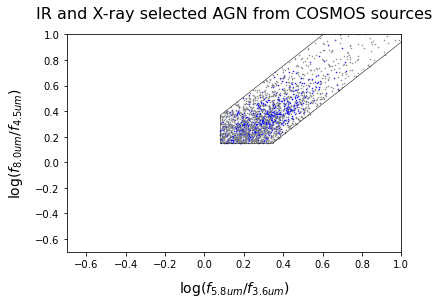

In [70]:
# plot data
plt.plot(x_wX,  y_wX,  '.', c='blue', markersize=1)
plt.plot(x_woX, y_woX, '.', c='gray', markersize=1)

# draw box
myP.PlotDonleyWedge()

# customize
# plt.legend(markerscale=8)
plt.title('IR and X-ray selected AGN from COSMOS sources') 

# set axis size and save
# plt.axis([-1.5,2.5,-1.5,2.5]) 
# plt.savefig(path_fig+'\COSMOS_IR-Xray_selection_FULL.png',bbox_inches ="tight",pad_inches=0.2,facecolor='w',edgecolor='w')
plt.axis([-0.7,1.0,-0.7,1.0]) 
# plt.savefig(path_fig+'\COSMOS_IR-Xray_selection_ZOOM.png',bbox_inches ="tight",pad_inches=0.2,facecolor='w',edgecolor='w')

# display
plt.show()